/Users/pw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in log
/Users/pw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in multiply
/Users/pw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in log
/Users/pw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in multiply


Score: 0.5625743921101853
[[2.42688402e-295]
 [0.00000000e+000]
 [0.00000000e+000]
 ...
 [0.00000000e+000]
 [0.00000000e+000]
 [6.46247432e-186]]


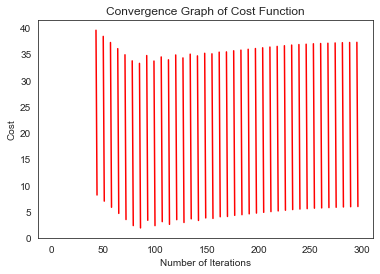

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
import seaborn as sns

# Data Upload

def data_upload(path):
    banks_df = pd.read_csv(path)
    return banks_df

#Returning the unique values
def unique_values(dataframe, column):
    unique_values=[]
    
    for col in column:
        unique_values.append(dataframe[col].unique())
    return unique_values
#Checking for any missing variables
def missing_check(dataframe):
    missing = dataframe.isnull().any()
    return missing

# Creating Dummy Variable for the response variable

def create_response_dummy(dataframe, column):
    dataframe[column] = dataframe[column].replace(['Yes','No'],[1,0])
    return dataframe

#Creating Dummy Variable for the other variables
def create_dummy(dataframe):
    
    cat_vars = ['country','location_type','cellphone_access','gender_of_respondent', 'relationship_with_head','marital_status','education_level','job_type']
    for var in cat_vars:
        cat_list = 'var'+'_'+'var'
        cat_list = pd.get_dummies(dataframe[var], prefix=var)
        dataframe_new = dataframe.join(cat_list)
        dataframe = dataframe_new
    data_vars = dataframe.columns.values.tolist()
    to_keep = [i for i in data_vars if i not in cat_vars]
    
    dataframe_final = dataframe[to_keep]
    
    return dataframe_final

#Defining the function to be used in calculating the cost
#Sigmoid function used to map any real value between 0 and 1
def sigmoid(x):
    return 1/(1 + np.exp(-x))

#A function that computes the weighted sum of inputs

def net_input(theta,x):
    return np.dot(x, theta)

#Probability after passing through sigmoid
def probability(theta,x):
    return sigmoid(net_input(theta,x))

#the cost and the gradient functions
#Computes the cost function for all the training samples
def costFunction(x,y,theta):
    m = x.shape[0]
    total_cost = -(1/m)* np.sum(
    y*np.log(probability(theta,x)) + (1-y)*np.log(
    1-probability(theta,x)))
    
    return total_cost

#Computes the gradient of the cost function at the point theta
def gradientDescent(x,y,theta,l_rate,iters):
    m = x.shape[0]
    cost_history = np.zeros((iters,1))
    
    for i in range(iters):
        theta = theta - (1/m)*np.dot(x.T, sigmoid(net_input(theta,x))-y)
        cost_history[i] = costFunction(x,y,theta)
        
    return(cost_history,theta)

#Determining the model accuracy
def score(theta,x,y):
    m = x.shape[0]
    y_pred = probability(theta,x)
    score = float(sum(y_pred == y))/float(m)
    return score

if __name__ == "__main__":
    #Data Upload
    
    path_train = '/Users/pw/Desktop/ZindiMl/Project 1/Train_v2.csv'
    banks_train = data_upload(path_train)
    path_test = '/Users/pw/Desktop/ZindiMl/Project 1/Test_v2.csv'
    banks_test = data_upload(path_test)
    
    column = 'bank_account'
    #The train Data Preparation
    new_bank_train = create_response_dummy(banks_train,column)
    data_train = create_dummy(new_bank_train)
    # X = feature values
    X_train = data_train.iloc[:,3:41]
    # Y the response
    y_train = data_train.iloc[:,2]
    #Preparing the data by converting the pandas dataframe into a an array
    X_train = np.c_[np.ones((X_train.shape[0],1)),X_train]
    y_train = y_train[:,np.newaxis]
    theta = np.zeros((X_train.shape[1],1))
    
    #The test data preparation
    #new_bank_test = create_response_dummy(banks_test,column)
    data_test = create_dummy(banks_test)
    #data_test.info()
    # X = feature values
    X_test = data_test.iloc[:,2:40]
    # Y the response
    #y_train = data_test.iloc[:,2]
    # Convert test data into an array
    X_test = np.c_[np.ones((X_test.shape[0],1)),X_test]
    #y_test = y_test[:,np.newaxis]
    #theta = np.zeros((X_train.shape[1],1))
    
    cost_history,theta = gradientDescent(X_train,y_train,theta,0.05,300)
    
    score = score(theta,X_train,y_train)
    
    print('Score:', score)
    
    predicted = probability(theta,X_test)
    print(predicted)
    plt.figure()
    sns.set_style('white')
    plt.plot(range(len(cost_history)), cost_history, 'r')
    plt.title("Convergence Graph of Cost Function")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.show()